## Voting
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 준비

In [2]:
from sklearn import datasets 

iris = datasets.load_iris() # 데이터 load
type(iris) #iris는 dataframe이 아닌 bunch

sklearn.utils._bunch.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.target_names #dictionary의 키 name에 접근하기 1
iris['target_names'] #dictionary의 키 name에 접근하기 2 (추천 방법)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# iris['data']

In [7]:
# iris['DESCR'] # iris 설명

In [8]:
# df 형태로 변환, feature 값
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# target 값
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# 결측치

# 중복치



### 학습셋 분리

In [11]:
# x,y 분리
x = df.drop(['target'],axis = 1)
y = df['target']

In [12]:
from sklearn.model_selection import train_test_split

# model
# x끼리, y끼리 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    stratify = y,  # stratify는 y값이 비율에 맞게 분리될 수 있도록 유도-데이터가 치우치지 않도록 유도
                                                    random_state=2022)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 정규화 (스케일링) - voting이라서 정규화
- 일반적으로 스케일링이 요구되지만, tree를 활용하는 모델은 정규화가 필요 없음
- tree 베이스 모델은 정규화를 하지 않아도 무관 (차이 발생은 가능)
- 유사도를 기준으로 running 되는 데이터는 정규화를 하는게 좋음

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler.fit(x_train) # 내부 평균, 표준편차 계산(학습)
# x_train = scaler.transform(x_train) #데이터 변경
# -> 위에 두 줄을 한 줄로 

x_train = scaler.fit_transform(x_train)
x_train[:5]

array([[ 0.74198233, -0.32371562,  0.33532535,  0.13579779],
       [ 0.24176952, -1.91389762,  0.73771577,  0.39652954],
       [-0.00833688, -0.77805333,  0.10538797,  0.00543191],
       [ 1.11714194, -0.09654676,  0.85268446,  1.43945654],
       [-0.50854969,  1.94797295, -1.15926764, -1.03749509]])

In [14]:
# model 생성 (knn, )
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import VotingClassifier

clf1 = KNeighborsClassifier() #KNN
clf2 = SVC() #svc
clf3 = DecisionTreeClassifier() #tree

clf = VotingClassifier(
    estimators = [('knn',clf1),('svc',clf2),('tree',clf3)],
    voting='hard',
    weights = [1, 1, 1] # knn, svc, tree 결과 값 비중 동일
)

In [15]:
clf.fit(x_train, y_train) # 학습 끝

VotingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier())],
                 weights=[1, 1, 1])

In [16]:
clf.score(x_train, y_train) #학습 정도(정확도)

0.9916666666666667

### 테스트 스코아 계산

In [17]:
# x_test, y_test 스케일링 후 작업

x_test = scaler.transform(x_test)
y_test = y_test.values


In [18]:
y_pred = clf.predict(x_test)
y_pred[:5]

array([2, 0, 2, 1, 0])

In [19]:
my.print_score(y_test, y_pred,average='macro') #2진 분류는 macro를 지정

accuraccy: 0.9333333333333333
precision: 0.9444444444444445
recall: 0.9333333333333332


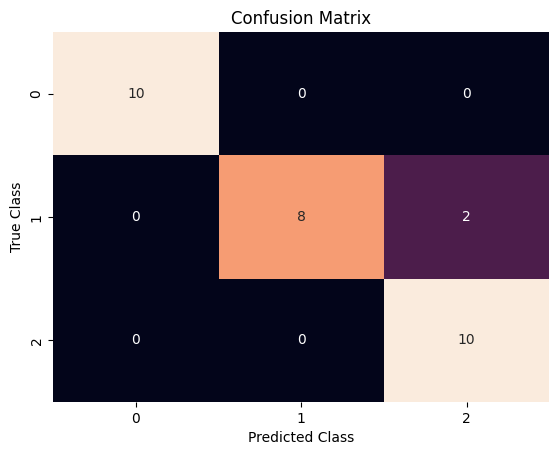

In [20]:
my.plot_confusion_matrix(y_test,y_pred) #대각선이 정답